<a href="https://colab.research.google.com/github/greymattar/ECG_WGAN_AugmentationClassification/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 4.2 MB/s eta 0:00:00


In [ ]:

from google.colab import drive
drive.mount ('/content/gdrive')
import sys
import os
#sys.path.append('/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main')
os.chdir('/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main')
print(os.getcwd())

Mounted at /content/gdrive
/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main


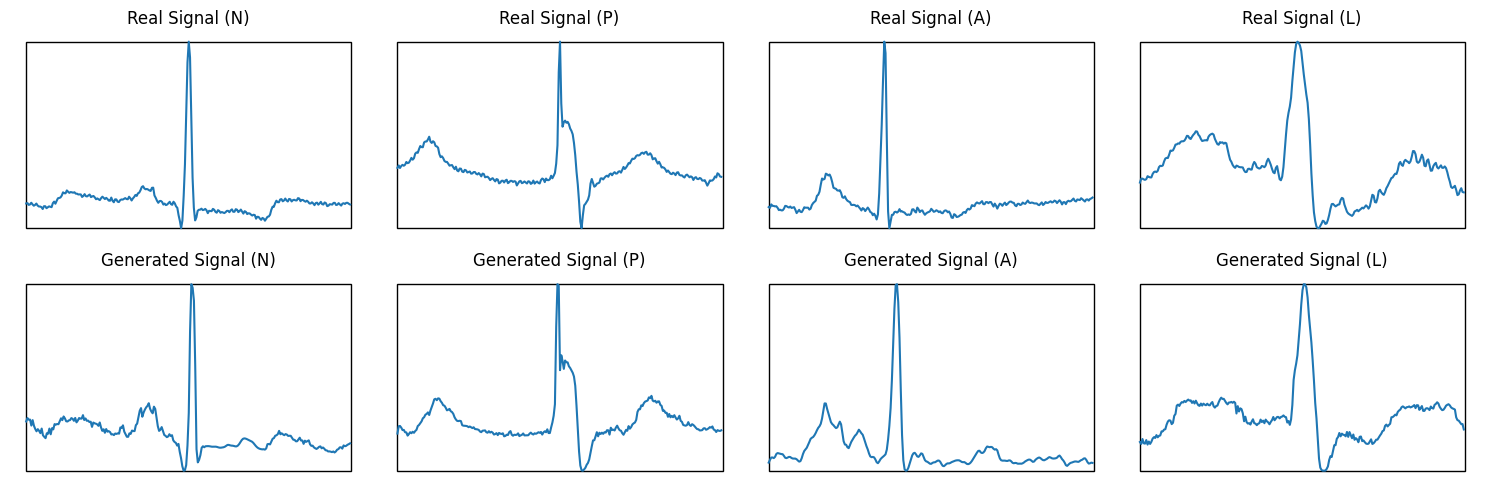

In [ ]:
import json
import os.path
import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

from utils_ac_wgan_gp_ecg import grid_plot

classes2keep = ['N','P', 'A', 'L']
classes2keep_folder = ['N','P', 'A', 'L']

cond_key = "cond"
screen_key = "screened"
drive = ""
folder = ""
d_set="MIT_BIH"
myPath_base = os.path.join(drive, "PycharmProjects\\paper2_gen_data\\", d_set, "multiclass", "01_{}\\{}".format(cond_key, screen_key))
myPath_read = os.path.join(myPath_base, folder)
myPath_base_template = os.path.join(drive, "PyCharmProjects\\paper2_data", d_set, "templates")

template_numbers = [1, 15, 15, 2, 1, 0, 0, 1, 2]
beat_numbers = [3410, 5805, 1255, 0, 1, 2, 3, 4, 5]
#A- 6549

# Load templates
template_signals = []
for cl, template_num in zip(classes2keep_folder, template_numbers):
    file_name_template = "templates_{}_.json".format(cl)
    with open(os.path.join(myPath_base_template, file_name_template), "r") as f:
        templates = json.load(f)
        template_signals.append(templates[template_num])

# Load generated beats
generated_beats = []
for cl, beat_num in zip(classes2keep, beat_numbers):
    file_name = "gb_{}_cond_screened.json".format(cl)
    with open(os.path.join(myPath_read, file_name), "r") as f:
        beats = json.load(f)
        generated_beats.append(beats[beat_num])

# Plot templates and generated beats
fig, axes = plt.subplots(2, len(classes2keep), figsize=(15, 5))

# Plot templates in the first row with a border around each beat
for i, template in enumerate(template_signals):
    axes[0, i].plot(template)
    axes[0, i].set_title(f"Real Signal ({classes2keep_folder[i]})")
    axes[0, i].axis('off')
    axes[0, i].add_patch(Rectangle((0, min(template)), len(template), max(template) - min(template), edgecolor='black', facecolor='none'))

# Plot generated beats in the second row with a border around each beat
for i, beat in enumerate(generated_beats):
    if i==0:
      axes[1, i].plot(combined_signal8)
      axes[1, i].set_title(f"Generated Signal ({classes2keep[i]})")
      axes[1, i].axis('off')
      axes[1, i].add_patch(Rectangle((0, min(combined_signal8)), len(combined_signal8), max(combined_signal8) - min(combined_signal8), edgecolor='black', facecolor='none'))
    elif i==2:
      axes[1, i].plot(smoothed_signal3)
      axes[1, i].set_title(f"Generated Signal ({classes2keep[i]})")
      axes[1, i].axis('off')
      axes[1, i].add_patch(Rectangle((0, min(smoothed_signal3)), len(smoothed_signal3), max(smoothed_signal3) - min(smoothed_signal3), edgecolor='black', facecolor='none'))
    else:
      axes[1, i].plot(beat)
      axes[1, i].set_title(f"Generated Signal ({classes2keep[i]})")
      axes[1, i].axis('off')
      axes[1, i].add_patch(Rectangle((0, min(beat)), len(beat), max(beat) - min(beat), edgecolor='black', facecolor='none'))

plt.tight_layout()
plt.show()


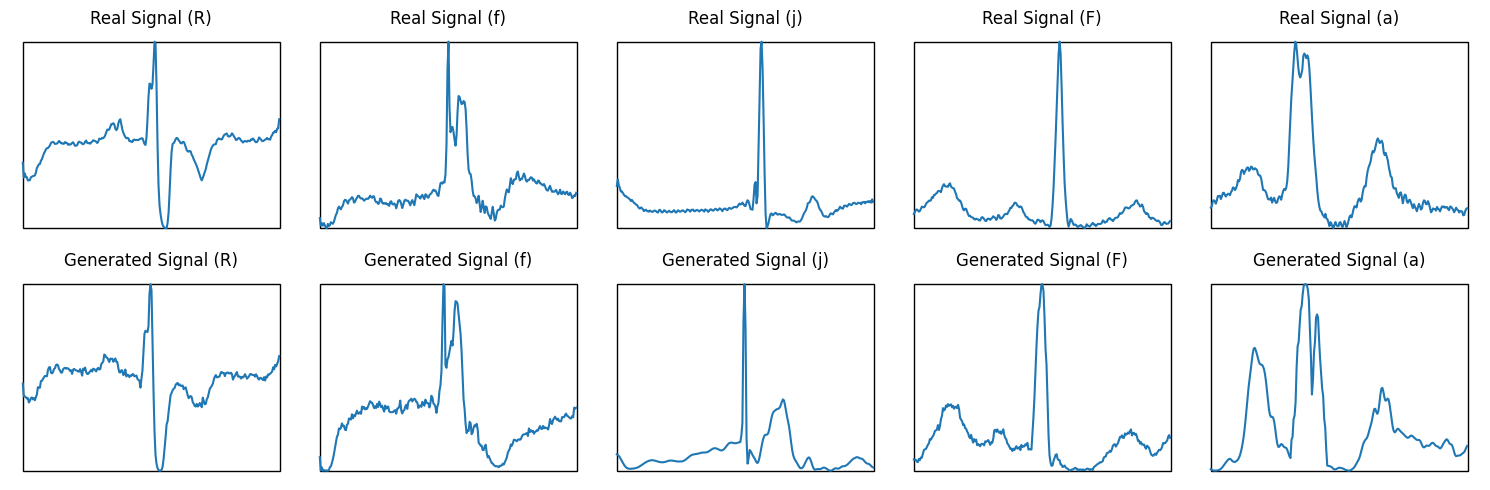

In [ ]:
import json
import os.path
import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

from utils_ac_wgan_gp_ecg import grid_plot

classes2keep = ['R', 'f', 'j','F','a']
classes2keep_folder = ['R', 'f', 'j','F','a']

cond_key = "cond"
screen_key = "screened"
drive = ""
folder = ""
d_set="MIT_BIH"
myPath_base = os.path.join(drive, "PycharmProjects\\paper2_gen_data\\", d_set, "multiclass", "01_{}\\{}".format(cond_key, screen_key))
myPath_read = os.path.join(myPath_base, folder)
myPath_base_template = os.path.join(drive, "PyCharmProjects\\paper2_data", d_set, "templates")

template_numbers = [ 5, 2, 1, 46, 22]
beat_numbers = [1, 9761, 4661, 4, 6622]
#A- 6549
#beat_numbers = [1, 9761, 4661, 4, 3941]
#

# Load templates
template_signals = []
for cl, template_num in zip(classes2keep_folder, template_numbers):
    file_name_template = "templates_{}_.json".format(cl)
    with open(os.path.join(myPath_base_template, file_name_template), "r") as f:
        templates = json.load(f)
        template_signals.append(templates[template_num])

# Load generated beats
generated_beats = []
for cl, beat_num in zip(classes2keep, beat_numbers):
    file_name = "gb_{}_cond_screened.json".format(cl)
    with open(os.path.join(myPath_read, file_name), "r") as f:
        beats = json.load(f)
        generated_beats.append(beats[beat_num])

# Plot templates and generated beats
fig, axes = plt.subplots(2, len(classes2keep), figsize=(15, 5))

# Plot templates in the first row with a border around each beat
for i, template in enumerate(template_signals):
    axes[0, i].plot(template)
    axes[0, i].set_title(f"Real Signal ({classes2keep_folder[i]})")
    axes[0, i].axis('off')
    axes[0, i].add_patch(Rectangle((0, min(template)), len(template), max(template) - min(template), edgecolor='black', facecolor='none'))

# Plot generated beats in the second row with a border around each beat
for i, beat in enumerate(generated_beats):
    if i==2:
      axes[1, i].plot(combined_signal)
      axes[1, i].set_title(f"Generated Signal ({classes2keep[i]})")
      axes[1, i].axis('off')
      axes[1, i].add_patch(Rectangle((0, min(combined_signal)), len(combined_signal), max(combined_signal) - min(combined_signal), edgecolor='black', facecolor='none'))
    elif i==4:
      axes[1, i].plot(combined_signal2)
      axes[1, i].set_title(f"Generated Signal ({classes2keep[i]})")
      axes[1, i].axis('off')
      axes[1, i].add_patch(Rectangle((0, min(combined_signal2)), len(combined_signal2), max(combined_signal2) - min(combined_signal2), edgecolor='black', facecolor='none'))
    else:
      axes[1, i].plot(beat)
      axes[1, i].set_title(f"Generated Signal ({classes2keep[i]})")
      axes[1, i].axis('off')
      axes[1, i].add_patch(Rectangle((0, min(beat)), len(beat), max(beat) - min(beat), edgecolor='black', facecolor='none'))

plt.tight_layout()
plt.show()


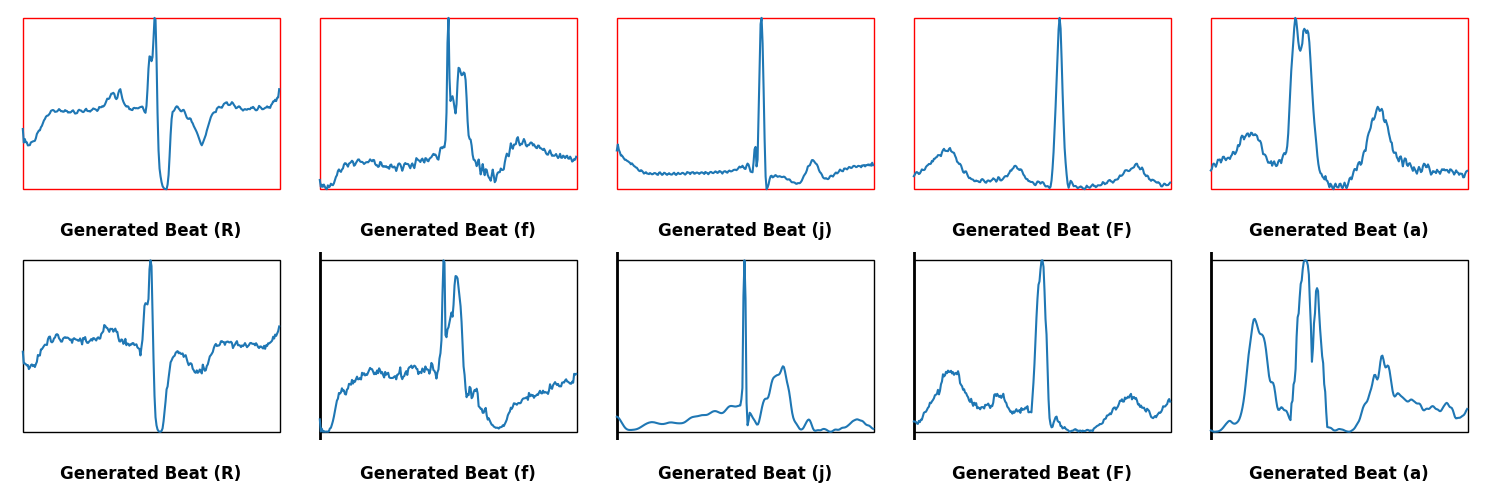

In [ ]:
# Plot templates and generated beats
fig, axes = plt.subplots(2, len(classes2keep), figsize=(15, 5))

# Plot templates in the first row with a border around each beat
for i, template in enumerate(template_signals):
    axes[0, i].plot(template)

    axes[0, i].axis('off')
    axes[0, i].add_patch(Rectangle((0, min(template)), len(template), max(template) - min(template), edgecolor='red', facecolor='none'))
    axes[0, i].text(0.5, -0.2, f"Generated Beat ({classes2keep[i]})", transform=axes[0, i].transAxes, ha='center', fontsize=12, fontweight='bold')

# Add vertical lines between classes in the second row
for i in range(1, len(classes2keep)):
    axes[1, i].axvline(x=0, color='black', linewidth=2)
    axes[1, i].axis('off')

# Plot generated beats in the second row with a border around each beat
for i, beat in enumerate(generated_beats):
    if i==2:
        axes[1, i].plot(combined_signal)
        axes[1, i].axis('off')
        axes[1, i].add_patch(Rectangle((0, min(combined_signal)), len(combined_signal), max(combined_signal) - min(combined_signal), edgecolor='black', facecolor='none'))
        axes[1, i].set_xlabel(f"Generated Beat ({classes2keep[i]})")
        axes[1, i].text(0.5, -0.2, f"Generated Beat ({classes2keep[i]})", transform=axes[1, i].transAxes, ha='center', fontsize=12, fontweight='bold')
    elif i==4:
        axes[1, i].plot(combined_signal2)
        axes[1, i].axis('off')
        axes[1, i].add_patch(Rectangle((0, min(combined_signal2)), len(combined_signal2), max(combined_signal2) - min(combined_signal2), edgecolor='black', facecolor='none'))
        axes[1, i].set_xlabel(f"Generated Beat ({classes2keep[i]})")
        axes[1, i].text(0.5, -0.2, f"Generated Beat ({classes2keep[i]})", transform=axes[1, i].transAxes, ha='center', fontsize=12, fontweight='bold')
    else:
        axes[1, i].plot(beat)
        axes[1, i].axis('off')
        axes[1, i].add_patch(Rectangle((0, min(beat)), len(beat), max(beat) - min(beat), edgecolor='black', facecolor='none'))
        axes[1, i].set_xlabel(f"Generated Beat ({classes2keep[i]})")
        axes[1, i].text(0.5, -0.2, f"Generated Beat ({classes2keep[i]})", transform=axes[1, i].transAxes, ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


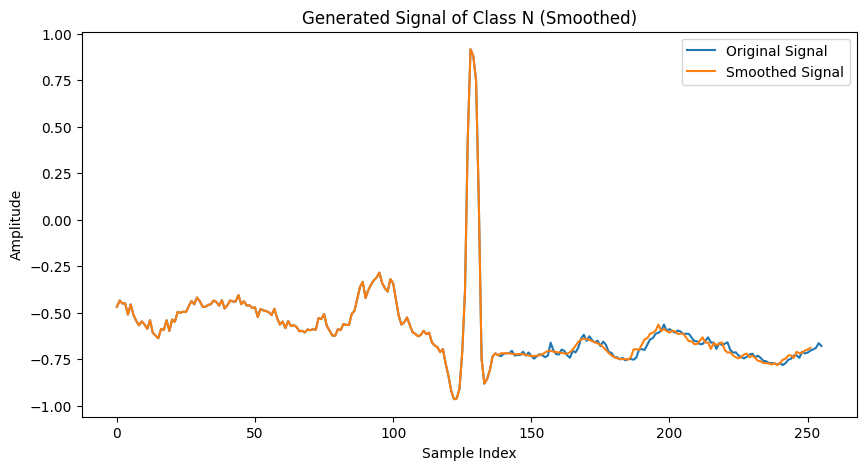

In [ ]:
import json
import os.path
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d



class_name = 'N'  # Class A
cond_key = "cond"
screen_key = "screened"
drive = ""
folder = ""
myPath_base = os.path.join(drive, "PycharmProjects\\paper2_gen_data\\", d_set, "multiclass", "01_{}\\{}".format(cond_key, screen_key))
myPath_read = os.path.join(myPath_base, folder)

# Load generated beats for class A
file_name = "gb_{}_cond_screened.json".format(class_name)
with open(os.path.join(myPath_read, file_name), "r") as f:
    generated_beats = json.load(f)

# Smooth the signal using savgol_filter
window_size = 15  # Window size for the smoothing filter
order = 3  # Order of the polynomial fit
signalA= generated_beats[3410]
smoothed_signal0= signalA[0:139]
smoothed_signal1 = gaussian_filter1d(signalA[140:185],1.5)

smoothed_signal2= signalA[186:254]


combined_signal8 = np.concatenate((smoothed_signal0,smoothed_signal1, smoothed_signal2), axis=0)


# Plot the original and smoothed signals
plt.figure(figsize=(10, 5))
plt.plot(signalA, label='Original Signal')
plt.plot(combined_signal8, label='Smoothed Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Generated Signal of Class N (Smoothed)')
plt.legend()
plt.show()


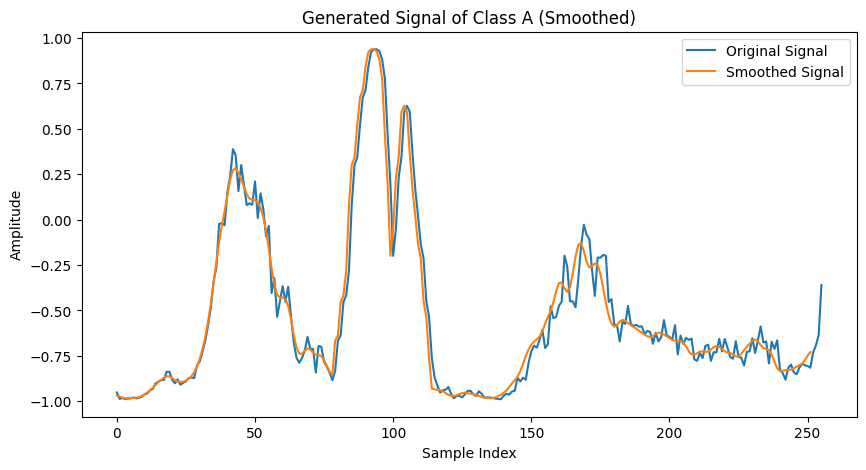

In [ ]:
import json
import os.path
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d



class_name = 'a'  # Class A
cond_key = "cond"
screen_key = "screened"
drive = ""
folder = ""
myPath_base = os.path.join(drive, "PycharmProjects\\paper2_gen_data\\", d_set, "multiclass", "01_{}\\{}".format(cond_key, screen_key))
myPath_read = os.path.join(myPath_base, folder)

# Load generated beats for class A
file_name = "gb_{}_cond_screened.json".format(class_name)
with open(os.path.join(myPath_read, file_name), "r") as f:
    generated_beats = json.load(f)

# Smooth the signal using savgol_filter
window_size = 15  # Window size for the smoothing filter
order = 3  # Order of the polynomial fit
signalA= generated_beats[3941]
smoothed_signal1 = gaussian_filter1d(signalA[0:79],1.5)
smoothed_signal3 = gaussian_filter1d(signalA[116:254], 1.5)
smoothed_signal2= signalA[80:115]


combined_signal2 = np.concatenate((smoothed_signal1, smoothed_signal2, smoothed_signal3), axis=0)


# Plot the original and smoothed signals
plt.figure(figsize=(10, 5))
plt.plot(signalA, label='Original Signal')
plt.plot(combined_signal2, label='Smoothed Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Generated Signal of Class A (Smoothed)')
plt.legend()
plt.show()


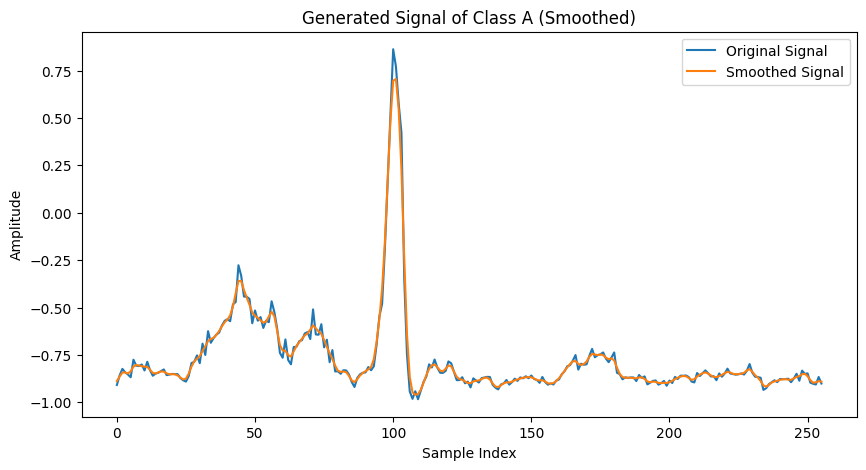

In [ ]:
import json
import os.path
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d


d_set="MIT_BIH"
class_name = 'A'  # Class A
cond_key = "cond"
screen_key = "screened"
drive = ""
folder = ""
myPath_base = os.path.join(drive, "PycharmProjects\\paper2_gen_data\\", d_set, "multiclass", "01_{}\\{}".format(cond_key, screen_key))
myPath_read = os.path.join(myPath_base, folder)

# Load generated beats for class A
file_name = "gb_{}_cond_screened.json".format(class_name)
with open(os.path.join(myPath_read, file_name), "r") as f:
    generated_beats = json.load(f)

# Smooth the signal using savgol_filter
window_size = 15  # Window size for the smoothing filter
order = 3  # Order of the polynomial fit
signalA= generated_beats[2650]
smoothed_signal3 = gaussian_filter1d(signalA, 1.0)


# Plot the original and smoothed signals
plt.figure(figsize=(10, 5))
plt.plot(signalA, label='Original Signal')
plt.plot(smoothed_signal3, label='Smoothed Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Generated Signal of Class A (Smoothed)')
plt.legend()
plt.show()


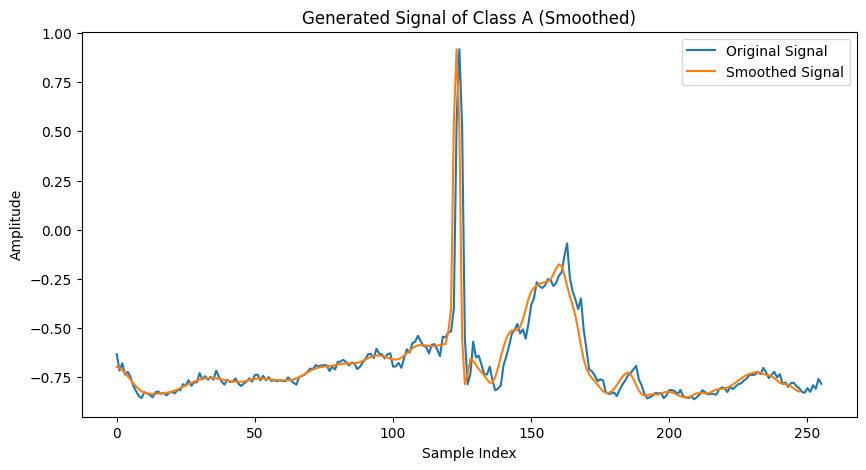

In [ ]:
import json
import os.path
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d



class_name = 'j'  # Class A
cond_key = "cond"
screen_key = "screened"
drive = ""
folder = ""
myPath_base = os.path.join(drive, "PycharmProjects\\paper2_gen_data\\", d_set, "multiclass", "01_{}\\{}".format(cond_key, screen_key))
myPath_read = os.path.join(myPath_base, folder)

# Load generated beats for class A
file_name = "gb_{}_cond_screened.json".format(class_name)
with open(os.path.join(myPath_read, file_name), "r") as f:
    generated_beats = json.load(f)

# Smooth the signal using savgol_filter
window_size = 15  # Window size for the smoothing filter
order = 3  # Order of the polynomial fit
signalA= generated_beats[716]
smoothed_signal1 = gaussian_filter1d(signalA[0:120], 3)
smoothed_signal3 = gaussian_filter1d(signalA[130:250], 1.5)
smoothed_signal2= signalA[121:129]


combined_signal = np.concatenate((smoothed_signal1, smoothed_signal2, smoothed_signal3), axis=0)


# Plot the original and smoothed signals
plt.figure(figsize=(10, 5))
plt.plot(signalA, label='Original Signal')
plt.plot(combined_signal, label='Smoothed Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Generated Signal of Class A (Smoothed)')
plt.legend()
plt.show()
